In [10]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.7.0


In [11]:
testdatasetFileName = "testdataset1.npz"


with np.load(testdatasetFileName, allow_pickle=True) as data:
    dataImages = data['images']
    dataLabels = data['labels']
    dataLabelNames = data['labelnames']


print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)

(14,)
(14,)
(14,)


## Image Resize

In [12]:
# model expect shape of image to be 200x200

import cv2 as cv

desiredShape = (200, 200, 3)

N = len(dataImages)
shape = (N, desiredShape[0], desiredShape[1], desiredShape[2])

y = np.empty(shape, dtype='uint8')

for i in range(N):
    y[i] = cv.resize(dataImages[i], [200,200], interpolation=cv.INTER_NEAREST)

dataImages.dtype, y.dtype, y.shape

dataImages = y

In [13]:
classNames = ['afiq',
              'azureen',
              'gavin',
              'goke',
              'inamul',
              'jincheng',
              'mahmuda',
              'numan',
              'saseendran']


In [14]:
#classNames = {'afiq':0, 'azureen':1, 'gavin':2, 'goke':3,  'inamul':4, 'jincheng':5, 'mahmuda':6, 'numan':7, 'saseendran':8}

In [15]:
testImages = dataImages
testLabels = dataLabels

In [16]:
testImages = testImages / 255.0
testLabels = testLabels.astype('uint8')

In [17]:
testImages.dtype

dtype('float64')

In [18]:
testLabels.shape

(14,)

In [19]:
exportPath = 'tf_model3/4_max'
newModel = tf.keras.models.load_model(exportPath)

newModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 120000)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               15360128  
                                                                 
 dense_3 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 15,361,289
Trainable params: 15,361,289
Non-trainable params: 0
_________________________________________________________________


In [20]:
loss, acc = newModel.evaluate(testImages, testLabels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

newPredictions = newModel.predict(testImages)

print(newPredictions.shape)

newPredictions[0]

1/1 - 1s - loss: 1.1360 - accuracy: 0.5714 - 545ms/epoch - 545ms/step
Restored model, accuracy: 57.14%
(14, 9)


array([ 1.040142 , -4.421138 ,  1.4789455, -3.8741822,  3.8264995,
       -4.224665 ,  2.1474686,  1.7536961,  0.6604347], dtype=float32)

In [21]:
predictedLabelList = []
for i in range(len(newPredictions[0])):
    predictedLabel = np.argmax(newPredictions[i])
    predictedLabelList.append(predictedLabel)
    print(f"{predictedLabel}, {testLabels[i]}, {predictedLabel == testLabels[i]}")

4, 0, False
1, 1, True
2, 2, True
3, 3, True
4, 4, True
4, 6, False
7, 8, False
4, 0, False
1, 1, True


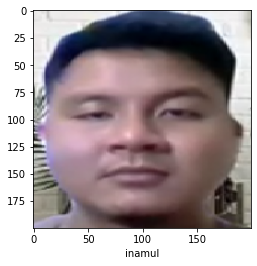

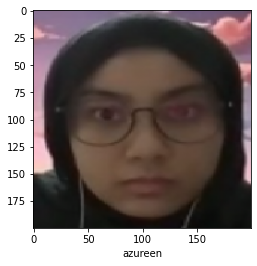

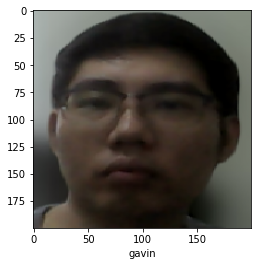

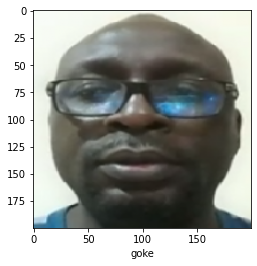

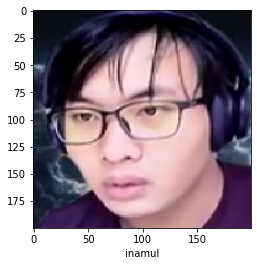

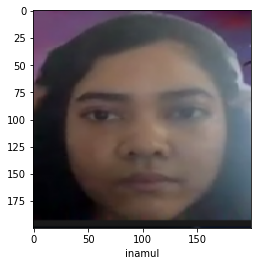

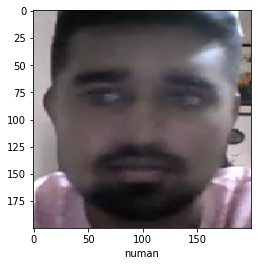

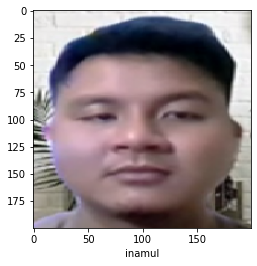

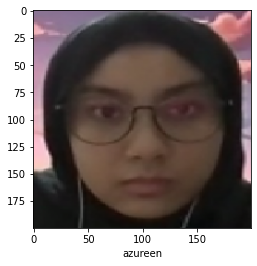

In [22]:
import matplotlib.pyplot as plt
for i in range(len(newPredictions[0])):
    #print(testLabels[i])
    plt.figure()
    imgRGB = testImages[i][:,:,::-1]
    plt.imshow(imgRGB)
    plt.xlabel(classNames[predictedLabelList[i]])
    #plt.colorbar()
    plt.grid(False)
    plt.show()

In [23]:
#insert softmax layer
probabilityModel = tf.keras.Sequential([newModel, tf.keras.layers.Softmax()])

newpredictions2 = probabilityModel.predict(testImages)
newpredictions2[0]


array([4.0748164e-02, 1.7310299e-04, 6.3194305e-02, 2.9911910e-04,
       6.6100949e-01, 2.1068389e-04, 1.2331442e-01, 8.3176486e-02,
       2.7874256e-02], dtype=float32)

In [24]:
np.argmax(newpredictions2[0]), testLabels[0]

(4, 0)

In [25]:
predictedLabelList2 = []
for i in range(len(newpredictions2[0])):
    predictedLabel = np.argmax(newpredictions2[i])
    predictedLabelList2.append(predictedLabel)
    print(f"{predictedLabel}, {testLabels[i]}, {predictedLabel == testLabels[i]}")

4, 0, False
1, 1, True
2, 2, True
3, 3, True
4, 4, True
4, 6, False
7, 8, False
4, 0, False
1, 1, True


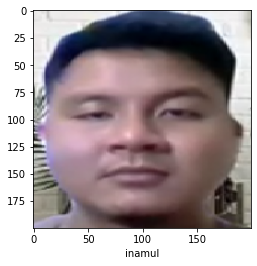

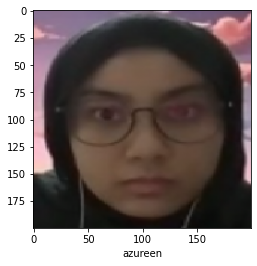

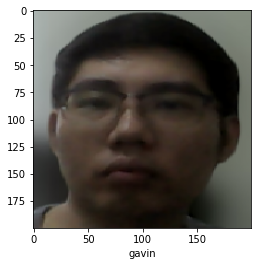

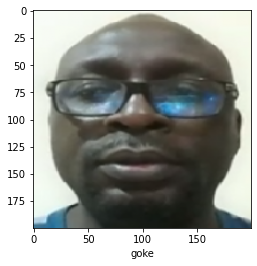

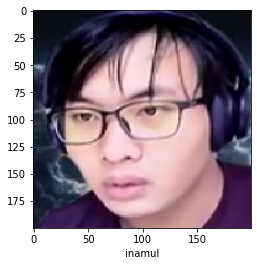

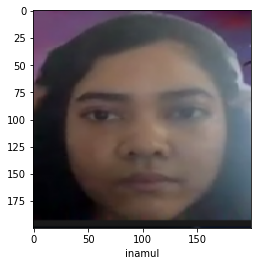

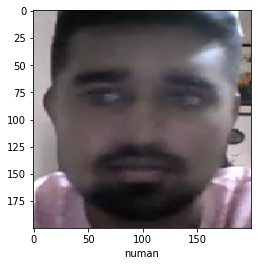

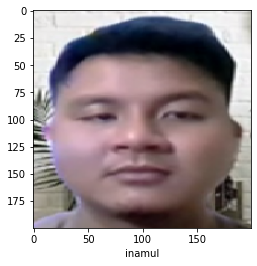

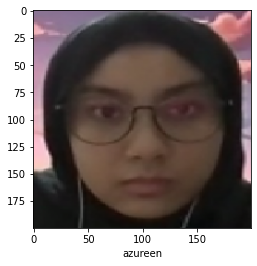

In [26]:
for i in range(len(newpredictions2[0])):
    #print(testLabels[i])
    plt.figure()
    imgRGB = testImages[i][:,:,::-1]
    plt.imshow(imgRGB)
    plt.xlabel(classNames[predictedLabelList2[i]])
    #plt.colorbar()
    plt.grid(False)
    plt.show()

## Compare with another model

In [27]:
exportPath = 'tf_model4/4_max'
newModel = tf.keras.models.load_model(exportPath)

newModel.summary()

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_54 (Flatten)        (None, 120000)            0         
                                                                 
 dense_108 (Dense)           (None, 128)               15360128  
                                                                 
 dense_109 (Dense)           (None, 9)                 1161      
                                                                 
Total params: 15,361,289
Trainable params: 15,361,289
Non-trainable params: 0
_________________________________________________________________


In [28]:
loss, acc = newModel.evaluate(testImages, testLabels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

newPredictions = newModel.predict(testImages)

print(newPredictions.shape)

newPredictions[0]

1/1 - 0s - loss: 0.5526 - accuracy: 0.8571 - 262ms/epoch - 262ms/step
Restored model, accuracy: 85.71%
(14, 9)


array([ 39.130215,  18.611456,  20.45725 ,  -9.46371 , -27.104586,
        21.505451,  15.331025,  19.44503 ,  20.766136], dtype=float32)

In [29]:
newPredictions.shape

(14, 9)

In [30]:
predictedLabelList = []
for i in range(len(newPredictions[0])):
    predictedLabel = np.argmax(newPredictions[i])
    predictedLabelList.append(predictedLabel)
    print(f"{predictedLabel}, {testLabels[i]}, {predictedLabel == testLabels[i]}")

0, 0, True
1, 1, True
2, 2, True
3, 3, True
4, 4, True
6, 6, True
3, 8, False
0, 0, True
1, 1, True


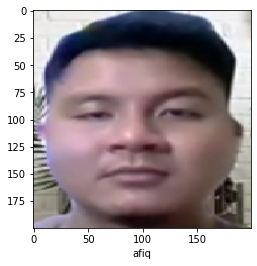

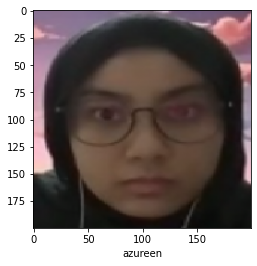

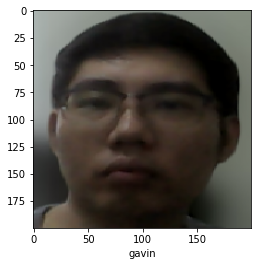

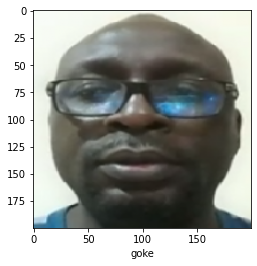

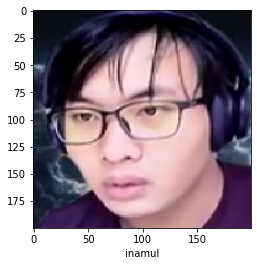

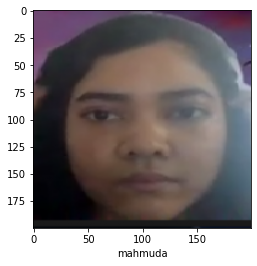

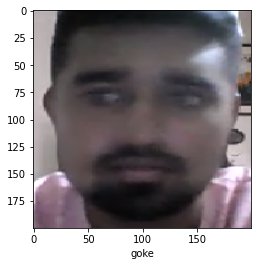

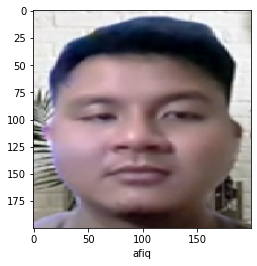

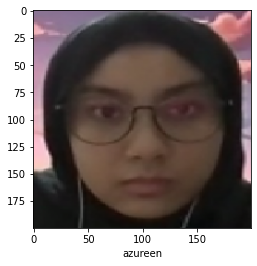

In [31]:
import matplotlib.pyplot as plt
for i in range(len(newPredictions[0])):
    
    plt.figure()
    plt.imshow(testImages[i][:,:,::-1])
    plt.xlabel(classNames[predictedLabelList[i]])
    #plt.colorbar()
    #plt.grid(False)
    plt.show()